In [1]:
# Install Python Sensitivity Analysis. 
!pip install sensitivity  

In [2]:
# Define classes to contain and encapsulate data.
from dataclasses import dataclass 
import pandas as pd
# Import in-built module for generating random numbers. 
import random 
# Display output inline.
%matplotlib inline
# Import to replicate a nested loop over the input values.
from sensitivity import SensitivityAnalyzer 

In [3]:
# Create a DataFrame consisting of various classes using Python's 'dataclass()'
# module and Object Oriented Programming (OPP).
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    starting_salary: int = 30000
    promos_every_n_years: int = 3
    cost_of_living_raise: float = 0.025
    promo_raise: float = 0.15
    savings_rate: float = 0.20
    interest_rate: float = 0.07
    desired_cash: int = 1000000

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data 

ModelInputs(starting_salary=30000, promos_every_n_years=3, cost_of_living_raise=0.025, promo_raise=0.15, savings_rate=0.2, interest_rate=0.07, desired_cash=1000000)

In [4]:
# Get the wage at a given year from the start of the model based 
# on the cost of living raises and regular promotions.
def wages_year(data: ModelInputs, year):
    # Every n years we have a promotion, so dividing the years and
    # taking out the decimals gets the number of promotions.
    num_promos = int(year / data.promos_every_n_years)  
    
   # This is the formula above implemented in Python.
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise)\
    ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

In [5]:
# Show the first four salaries in the range and 
# print the results using the f-string.
for i in range(4):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is £{salary:,.0f}.')

The wage at year 1 is £30,750.
The wage at year 2 is £31,519.
The wage at year 3 is £37,153.
The wage at year 4 is £38,082.


In [6]:
# Calculate the cash saved within a given year by first 
# calculating the salary at that year then applying the savings rate.
def cash_saved_during_year(data: ModelInputs, year):
    salary = wages_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

# Calculate the accumulated wealth for a given year based
# on previous wealth, the investment rate, and cash saved during the year.
def wealth_year(data: ModelInputs, year, prior_wealth):
                cash_saved = cash_saved_during_year(data, year)
                wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
                return wealth

In [7]:
# Start with no cash saved.
prior_wealth = 0  
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'The accumulated wealth at year {year} is £{wealth:,.0f}.')
    
    # Set next year's prior wealth to this year's wealth:
    prior_wealth = wealth

The accumulated wealth at year 1 is £6,150.
The accumulated wealth at year 2 is £12,884.
The accumulated wealth at year 3 is £21,217.
The accumulated wealth at year 4 is £30,318.


In [8]:
def years_to_retirement(data: ModelInputs, print_output=True):
    # Start with no cash saved.
    prior_wealth = 0  
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  
   
    if print_output:
        print('Wealths over time:')
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_year(data, year, prior_wealth)
        if print_output:
            print(f'The accumulated wealth at year {year} is £{wealth:,.0f}.')
            # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth  
       
    # Now we have run the while loop, the wealth must be >= desired_cash 
    # (whatever last year was set is the years to retirement), which we can print.
    if print_output:
        # \n makes a blank line in the output.
        print(f'\nRetirement:\nIt will take {year} years to retire.')  
    return year

In [9]:
years = years_to_retirement(model_data)

Wealths over time:
The accumulated wealth at year 1 is £6,150.
The accumulated wealth at year 2 is £12,884.
The accumulated wealth at year 3 is £21,217.
The accumulated wealth at year 4 is £30,318.
The accumulated wealth at year 5 is £40,247.
The accumulated wealth at year 6 is £52,267.
The accumulated wealth at year 7 is £65,358.
The accumulated wealth at year 8 is £79,601.
The accumulated wealth at year 9 is £96,569.
The accumulated wealth at year 10 is £115,010.
The accumulated wealth at year 11 is £135,033.
The accumulated wealth at year 12 is £158,599.
The accumulated wealth at year 13 is £184,167.
The accumulated wealth at year 14 is £211,887.
The accumulated wealth at year 15 is £244,197.
The accumulated wealth at year 16 is £279,206.
The accumulated wealth at year 17 is £317,114.
The accumulated wealth at year 18 is £360,957.
The accumulated wealth at year 19 is £408,411.
The accumulated wealth at year 20 is £459,741.
The accumulated wealth at year 21 is £518,729.
The accumulat

In [10]:
def years_to_retirement(data):
    # Start with no cash saved.
    prior_wealth = 0  
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0
    
    # Set up output to be displayed as a DataFrame as tuples.
    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_year(data, year, prior_wealth)
        
        # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth  
        
        # Save the results in a tuple for later building the DataFrame.
        df_data_tups.append((year, wealth))
       
    # Now we have run the while loop, so wealth must be >= desired_cash. 
    # Create the DataFrame.
    df = pd.DataFrame(df_data_tups, columns=['Year', 'Wealth'])
    
    return df

# Save the function results into the DataFrame.
results_df = years_to_retirement(model_data)

# View the DataFrame.
results_df.head()

,Year,Wealth
0,1,6150.000000
1,2,12884.250000
2,3,21216.692812
3,4,30318.170255
4,5,40247.158841


<Axes: xlabel='Year'>

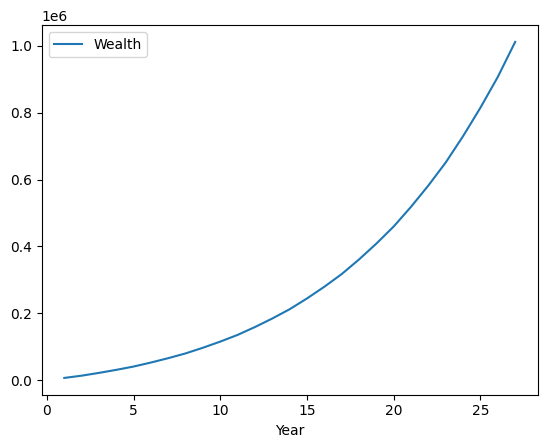

In [11]:
# Visualise wealth change over time.
results_df.plot('Year' , 'Wealth')